<a href="https://colab.research.google.com/github/TheRadDani/AI/blob/main/TextGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/dswh/lil_nlp_with_tensorflow/blob/main/04_02_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Text generation

This notebook explains how we can split a given corpus of data into features and labels and then train a neural network to predict the next word in a sentence.

1. Create a corpus - break the text down to list of sentences.
2. Create a word_index(vocabulary) from the text.
3. Tokenize the data and create n-gram sequence for each sequence of the corpus.
4. Pad those sequences.
5. Segregate features from the sequences by reserving the last element of the array as labels.


In [111]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential

print(tf.__version__)

2.8.2


## Step 1: Create a corpus

In [97]:
data = "October arrived, spreading a damp chill over the grounds and into the castle.\n\
 Madam Pomfrey, the nurse, was kept busy by a sudden spate of colds among the staff \
 and students.\n Her Pepperup potion worked instantly, though it left the drinker smoking \
 at the ears for several hours afterward. Ginny Weasley, who had been looking pale, was bullied into taking some \
 by Percy.\n The steam pouring from under her vivid hair gave the impression that her whole head was on fire.\n \
 Raindrops the size of bullets thundered on the castle windows for days on end; the lake rose, the flower beds turned into muddy \
 streams, and Hagrid's pumpkins swelled to the size of garden sheds.\n Oliver Wood's enthusiasm for regular training sessions, however, \
 was not dampened, which was why Harry was to be found, late one stormy Saturday afternoon a few days before Halloween, returning \
 to Gryffindor Tower, drenched to the skin and splattered with mud."


In [96]:
##instantiate tokenizer
tokenizer = Tokenizer()

##create corpus by lowering the letters and splitting the text by \n
corpus = data.lower().rstrip('').split("\n")
corpus

['october arrived, spreading a damp chill over the grounds and into the castle.',
 ' madam pomfrey, the nurse, was kept busy by a sudden spate of colds among the staff  and students.',
 ' her pepperup potion worked instantly, though it left the drinker smoking  at the ears for several hours afterward. ginny weasley, who had been looking pale, was bullied into taking some  by percy.',
 ' the steam pouring from under her vivid hair gave the impression that her whole head was on fire.',
 "  raindrops the size of bullets thundered on the castle windows for days on end; the lake rose, the flower beds turned into muddy  streams, and hagrid's pumpkins swelled to the size of garden sheds.",
 " oliver wood's enthusiasm for regular training sessions, however,  was not dampened, which was why harry was to be found, late one stormy saturday afternoon a few days before halloween, returning  to gryffindor tower, drenched to the skin and splattered with mud."]

## Step 2: Train the tokenizer and create word encoding dictionary

In [98]:
tokenizer.fit_on_texts(corpus)

##calculate vocabulary size - +1 for <oov> token
vocab_size = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(vocab_size)

{'the': 1, 'was': 2, 'and': 3, 'to': 4, 'a': 5, 'into': 6, 'of': 7, 'her': 8, 'for': 9, 'on': 10, 'castle': 11, 'by': 12, 'size': 13, 'days': 14, 'october': 15, 'arrived': 16, 'spreading': 17, 'damp': 18, 'chill': 19, 'over': 20, 'grounds': 21, 'madam': 22, 'pomfrey': 23, 'nurse': 24, 'kept': 25, 'busy': 26, 'sudden': 27, 'spate': 28, 'colds': 29, 'among': 30, 'staff': 31, 'students': 32, 'pepperup': 33, 'potion': 34, 'worked': 35, 'instantly': 36, 'though': 37, 'it': 38, 'left': 39, 'drinker': 40, 'smoking': 41, 'at': 42, 'ears': 43, 'several': 44, 'hours': 45, 'afterward': 46, 'ginny': 47, 'weasley': 48, 'who': 49, 'had': 50, 'been': 51, 'looking': 52, 'pale': 53, 'bullied': 54, 'taking': 55, 'some': 56, 'percy': 57, 'steam': 58, 'pouring': 59, 'from': 60, 'under': 61, 'vivid': 62, 'hair': 63, 'gave': 64, 'impression': 65, 'that': 66, 'whole': 67, 'head': 68, 'fire': 69, 'raindrops': 70, 'bullets': 71, 'thundered': 72, 'windows': 73, 'end': 74, 'lake': 75, 'rose': 76, 'flower': 77, '

## Step 3: Create N-gram sequence

<h1>n-Gram Sequence</h1>
text to sequence of a line:
[54,23,2,1,10,11,68]


n-gram sequence:
[54,23]


[54,23,2]


[54,23,2,1]


[54,23,2,1,10]


[54,23,2,1,10,11]


[54,23,2,1,10,11,68]

In [99]:
##create n-gram sequences of each text sequence
input_sequences = []
for line in corpus:
    tokens = tokenizer.texts_to_sequences([line])[0]  # get all the tokens of the sequence
    for i in range(1, len(tokens)):  # create n-gram sequences
        n_gram_sequence = tokens[:i+1]
        input_sequences.append(n_gram_sequence)
print(len(input_sequences), max([len(i) for i in input_sequences]))

150 41


In [100]:
##pad sequences
max_seq_len = max([len(i) for i in input_sequences])
input_seq_array = np.array(pad_sequences(input_sequences,
                                         maxlen=max_seq_len,
                                         padding='pre')
                        )
input_seq_array

array([[  0,   0,   0, ...,   0,  15,  16],
       [  0,   0,   0, ...,  15,  16,  17],
       [  0,   0,   0, ...,  16,  17,   5],
       ...,
       [  0,   0,  87, ..., 113,   3, 114],
       [  0,  87,  88, ...,   3, 114, 115],
       [ 87,  88,  89, ..., 114, 115, 116]], dtype=int32)

## Step 4: Extract features and labels

In [101]:
##creating features(X) and label(y)
X = input_seq_array[:, :-1]
labels = input_seq_array[:, -1]

##one-hot encode the labels to get y
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)
print(len(labels), len(y))
print(labels)
print(y)

150 150
[ 16  17   5  18  19  20   1  21   3   6   1  11  23   1  24   2  25  26
  12   5  27  28   7  29  30   1  31   3  32  33  34  35  36  37  38  39
   1  40  41  42   1  43   9  44  45  46  47  48  49  50  51  52  53   2
  54   6  55  56  12  57  58  59  60  61   8  62  63  64   1  65  66   8
  67  68   2  10  69   1  13   7  71  72  10   1  11  73   9  14  10  74
   1  75  76   1  77  78  79   6  80  81   3  82  83  84   4   1  13   7
  85  86  88  89   9  90  91  92  93   2  94  95  96   2  97  98   2   4
  99 100 101 102 103 104 105   5 106  14 107 108 109   4 110 111 112   4
   1 113   3 114 115 116]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [102]:
print(tokenizer.word_index['mud'],'\n')
print(X[0],'\n')
print(labels[0],'\n')
print("One-hot encodiung for the label: {0}".format(y[0]))

116 

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15] 

16 

One-hot encodiung for the label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Define the LSTM model

In [103]:
model = tf.keras.Sequential([
                tf.keras.layers.Embedding(vocab_size, 64, input_length=max_seq_len-1),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                tf.keras.layers.Dense(vocab_size, activation='softmax') #multiclass problem
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=500, verbose=1)

Epoch 1/500
5/5 [==============================] - 3s 10ms/step - loss: 4.7640 - accuracy: 0.0133
Epoch 2/500
5/5 [==============================] - 0s 9ms/step - loss: 4.7466 - accuracy: 0.0867
Epoch 3/500
5/5 [==============================] - 0s 9ms/step - loss: 4.7263 - accuracy: 0.0867
Epoch 4/500
5/5 [==============================] - 0s 9ms/step - loss: 4.6790 - accuracy: 0.0867
Epoch 5/500
5/5 [==============================] - 0s 9ms/step - loss: 4.6133 - accuracy: 0.0867
Epoch 6/500
5/5 [==============================] - 0s 9ms/step - loss: 4.5456 - accuracy: 0.0867
Epoch 7/500
5/5 [==============================] - 0s 8ms/step - loss: 4.5203 - accuracy: 0.0867
Epoch 8/500
5/5 [==============================] - 0s 8ms/step - loss: 4.4947 - accuracy: 0.0867
Epoch 9/500
5/5 [==============================] - 0s 8ms/step - loss: 4.4780 - accuracy: 0.0867
Epoch 10/500
5/5 [==============================] - 0s 8ms/step - loss: 4.4615 - accuracy: 0.0867
Epoch 11/500
5/5 [==========

## Visualize metrics

In [104]:
import matplotlib.pyplot as plt


def plot_metric(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

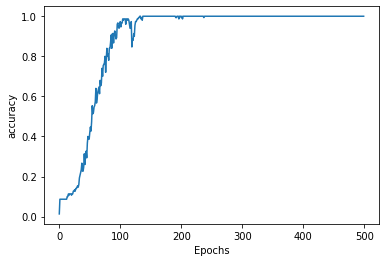

In [105]:
plot_metric(history, 'accuracy')

## Generate new text

In [123]:
seed_text = "It was a cold night."

##add number of words you want to predict
next_words = 100
  
##run the loop to predict and concatenate the word
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
 
    ##predict the class using the trained model
	#predicted = model.predict_classes(token_list, verbose=0) #(deprecated)
	predict_x=model.predict(token_list)
	classes_x=np.argmax(predict_x,axis=1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
        ##reference the predicted class with the vocabulary
		if index == classes_x:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

It was a cold night. thundered on the castle windows for days on end the lake rose the flower beds beds turned into muddy streams and hagrid's pumpkins swelled to the size of garden sheds sheds sheds sheds sheds sheds skin and into and splattered with mud mud mud mud mud skin and into the splattered with mud mud mud mud mud mud mud skin and mud the sheds skin and flower flower turned into of size garden sheds sheds sheds sheds garden sheds sheds sheds sheds sheds skin the splattered with mud mud skin halloween tower mud mud mud mud mud mud mud mud
